In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [8]:
customers = pd.read_csv('../datasets/Customers.csv')
products = pd.read_csv('../datasets/Products.csv')
transactions = pd.read_csv('../datasets/Transactions.csv')


# Display the first few rows
print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [9]:
print(customers.info())
print(products.info())
print(transactions.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [10]:
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
print(merged_data.head())


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

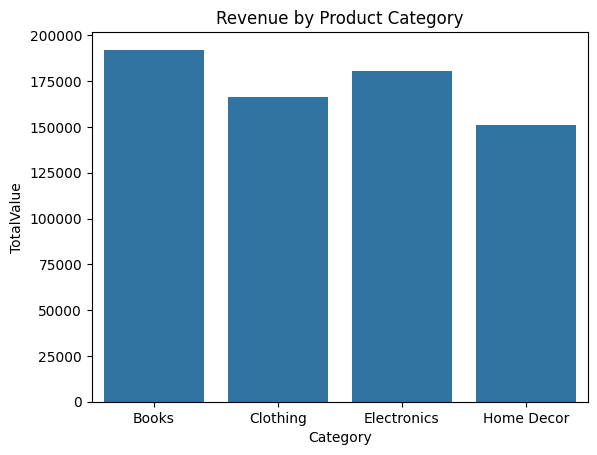

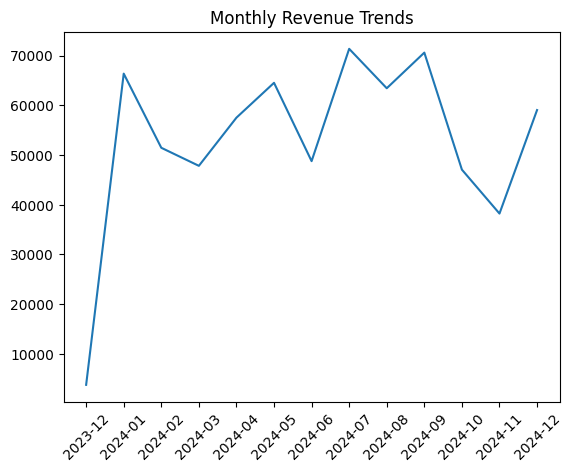

In [11]:
# Total revenue by category
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().reset_index()
sns.barplot(data=category_revenue, x='Category', y='TotalValue')
plt.title('Revenue by Product Category')
plt.show()

# Transactions over time
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_revenue = merged_data.groupby('Month')['TotalValue'].sum().reset_index()
plt.plot(monthly_revenue['Month'].astype(str), monthly_revenue['TotalValue'])
plt.title('Monthly Revenue Trends')
plt.xticks(rotation=45)
plt.show()


INSIGHT-1 Customer Lifetime Value (CLV) Segmentation

In [12]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


customer_lifetime_value = transactions.groupby('CustomerID')['TotalValue'].sum()

# Identify high-value customers (Top 25% by spending)
high_value_customers = customer_lifetime_value[customer_lifetime_value > customer_lifetime_value.quantile(0.75)]

# Identify low-value customers (Bottom 25% by spending)
low_value_customers = customer_lifetime_value[customer_lifetime_value < customer_lifetime_value.quantile(0.25)]

print("High-value customers:\n", high_value_customers)
print("\nLow-value customers:\n", low_value_customers)

High-value customers:
 CustomerID
C0004     5354.88
C0012     5231.26
C0013     6000.56
C0018     4781.85
C0021     5419.92
C0023     5158.65
C0028     6819.57
C0041     6149.78
C0045     6021.80
C0046     5627.83
C0051     5699.57
C0053     5316.46
C0054     8040.39
C0059     7073.28
C0065     7663.70
C0068     5950.42
C0075     5848.97
C0082     7572.91
C0087     6604.23
C0093     5294.99
C0096     6072.92
C0099     6715.72
C0100     5003.45
C0101     5550.99
C0102     6132.36
C0104     6579.10
C0105     4807.45
C0108     4848.54
C0109     5487.25
C0113     4812.10
C0114     5780.43
C0122     5072.55
C0138     5610.25
C0141    10673.87
C0143     6044.63
C0145     5771.27
C0148     5457.79
C0155     5377.83
C0156     7634.45
C0162     4802.24
C0163     5775.28
C0165     6708.10
C0168     5053.83
C0170     4931.74
C0171     5145.35
C0173     5808.04
C0175     6210.53
C0182     4980.77
C0188     7111.32
C0196     4982.88
Name: TotalValue, dtype: float64

Low-value customers:
 CustomerID

INSIGHT-2 (Product Revenue and Profitability Analysis)

In [22]:
product_revenue = transactions.merge(products, on='ProductID').groupby('Category')['TotalValue'].sum()
print(f"Revenue per product category: {product_revenue}")


Revenue per product category: Category
Books          192147.47
Clothing       166170.66
Electronics    180783.50
Home Decor     150893.93
Name: TotalValue, dtype: float64


INSIGHT-3 (Regional Purchase Patterns and Targeted Marketing)

In [24]:
transactions_with_products = transactions.merge(products, on='ProductID', how='left')

# Merge the result with the customers data to get the region information
transactions_with_full_info = transactions_with_products.merge(customers, on='CustomerID', how='left')

# Now you can group by region and category, and sum the total value
region_product_sales = transactions_with_full_info.groupby(['Region', 'Category'])['TotalValue'].sum()

# Print the result
print(f"Revenue by region and category:\n{region_product_sales}")

Revenue by region and category:
Region         Category   
Asia           Books          33119.03
               Clothing       49353.09
               Electronics    35658.15
               Home Decor     33944.70
Europe         Books          47464.42
               Clothing       36335.59
               Electronics    41562.60
               Home Decor     40892.02
North America  Books          41811.99
               Clothing       38038.49
               Electronics    44716.43
               Home Decor     27746.49
South America  Books          69752.03
               Clothing       42443.49
               Electronics    58846.32
               Home Decor     48310.72
Name: TotalValue, dtype: float64


INSIGHT-4 (Customer Acquisition and Retention Trends)

In [25]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
new_customers = customers[customers['SignupDate'] >= pd.to_datetime('2023-01-01')]
print(f"New customers in 2023: {new_customers.shape[0]}")


New customers in 2023: 136


INSIGHT-5 (Transaction Frequency and Value Correlation)

In [26]:
transaction_frequency = transactions.groupby('CustomerID').size()
avg_transaction_value = transactions.groupby('CustomerID')['TotalValue'].mean()
freq_value_corr = transaction_frequency.corr(avg_transaction_value)
print(f"Correlation between transaction frequency and value: {freq_value_corr}")


Correlation between transaction frequency and value: 0.023321887015262735


INSIGHT-6

In [27]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
sales_by_month = transactions.groupby(transactions['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
print(f"Monthly sales trends: {sales_by_month}")


Monthly sales trends: TransactionDate
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


INSIGHT-7 (Most Popular Product Categories)

In [36]:
# Grouping by product category and calculating total sales
category_sales = transactions.merge(products, on='ProductID').groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print(f"Most popular product categories by sales: {category_sales}")


Most popular product categories by sales: Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


INSIGHT-8 (Customer Acquisition Trend)

In [37]:
# Extracting the year and month from signup date
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['YearMonth'] = customers['SignupDate'].dt.to_period('M')

# Grouping by year and month to get the number of customers signed up each month
customer_acquisition_trend = customers.groupby('YearMonth').size()
print(f"Customer acquisition trend over time: {customer_acquisition_trend}")


Customer acquisition trend over time: YearMonth
2022-01     1
2022-02     7
2022-03     8
2022-04     8
2022-05     8
2022-06     5
2022-07     4
2022-08     4
2022-09     6
2022-10     3
2022-11     3
2022-12     7
2023-01     5
2023-02     6
2023-03     8
2023-04     6
2023-05     3
2023-06     3
2023-07     3
2023-08     2
2023-09     4
2023-10     7
2023-11     5
2023-12     5
2024-01     9
2024-02     8
2024-03     4
2024-04    10
2024-05     6
2024-06     4
2024-07     6
2024-08     4
2024-09    11
2024-10     5
2024-11    11
2024-12     1
Freq: M, dtype: int64


INSIGHT-9 (High-Value Customers)

In [39]:
# Grouping by customer and calculating total spending
customer_spending = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
high_value_customers = customer_spending.head(10)
print(f"Top 10 high-value customers: {high_value_customers}")


Top 10 high-value customers: CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64
